In [1]:
import pandas as pd
import requests as rq
from zipfile import ZipFile
from matplotlib import pyplot as plt
import seaborn as sns

## Person/Name, known for titles

In [3]:
imdb_name_basics_df = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
imdb_name_basics_df.head(1)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"


## Title AKA

In [4]:
imdb_title_akas_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
imdb_title_akas_df.head(10)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


## Title, Genre

In [5]:
imdb_title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_title_basics_df.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


## Directors, Writers

In [6]:
imdb_title_crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
imdb_title_crew_df.head(1)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854


## Job (actor/actress, Director)

In [12]:
imdb_title_principals_df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
imdb_title_principals_df.head(20)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


## Avg Rating

In [8]:
imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_title_ratings_df.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31


In [9]:
imdb_rating_genre_df = imdb_title_ratings_df.merge(imdb_title_basics_df, on='tconst')
imdb_highest_rated_genres_df = imdb_rating_genre_df.sort_values('averagerating' , ascending=False)
imdb_highest_rated_genres_df['averagerating'].value_counts()

7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64

NameError: name 'plot' is not defined

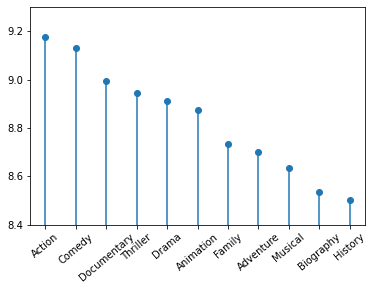

In [10]:
imdb_complete_df = imdb_title_ratings_df.merge(imdb_title_principals_df, on='tconst').merge(imdb_title_crew_df, on='tconst').merge(imdb_title_basics_df, on='tconst')
imdb_complete_df.head(10)
imdb_complete_df.dropna(subset=['genres'], axis=0, inplace=True)
imdb_low_ratings = imdb_complete_df[imdb_complete_df['averagerating'] < 8.5].index
imdb_complete_df.drop(imdb_low_ratings, inplace=True)
imdb_low_votes = imdb_complete_df[imdb_complete_df['numvotes'] < 300.0].index
imdb_complete_df.drop(imdb_low_votes, inplace=True)
# # imdb_complete_df['averagerating'].value_counts()
# # imdb_complete_df.info()
imdb_genre_ratings = imdb_complete_df.drop(['tconst','ordering','nconst','category','job','characters','directors','writers','primary_title','original_title','start_year','runtime_minutes'], axis=1)
imdb_genre_ratings.set_index('genres')
imdb_genre_ratings.sort_values(by='averagerating', ascending=False)
imdb_genre_ratings_with_comma = imdb_genre_ratings[imdb_genre_ratings['genres'].str.contains(',')].index
imdb_genre_ratings.drop(imdb_genre_ratings_with_comma, inplace=True)
# imdb_genre_ratings.groupby('genres').mean().sort_values(by='averagerating', ascending=False)
imdb_ratings_means = imdb_genre_ratings.groupby('genres').mean().sort_values(by='averagerating', ascending=False)
imdb_ratings_means
# imdb_genre_ratings.min()
fig, ax = plt.subplots()
ax.stem(imdb_ratings_means.index, imdb_ratings_means['averagerating'])
ax.set(ylim=(8.4, 9.3))
ax.tick_params(axis='x', labelrotation = 40)
plot(x, y, color='green', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=12)

In [ ]:
imdb_1tconst_df = imdb_complete_df.drop_duplicates(subset='tconst')
imdb_1tconst_df = imdb_1tconst_df.rename({'primary_title':'movie'}, axis=1).set_index('movie')
imdb_1tconst_df.head(1)

## Genre, Synopsis, Director

In [14]:
rt_movie_info_df = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', error_bad_lines=False, sep='\t')
rt_movie_info_df = rt_movie_info_df.rename({'rating':'rated'}, axis=1)
rt_movie_info_by_id_df = rt_movie_info_df.set_index('id')
rt_movie_info_by_id_df.head(10)
# rt_movie_info_df.info()

,synopsis,rated,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN


## RT Rating, Fresh/Rotten

In [15]:
rt_reviews_df = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', error_bad_lines=False, encoding= 'unicode_escape', sep='\t')
rt_reviews_by_id_df = rt_reviews_df.set_index('id')
rt_reviews_by_id_df.head(1)
# rt_reviews_df['review'][0]

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


In [ ]:
rt_complete_df = rt_movie_info_by_id_df.join(rt_reviews_by_id_df, on='id')
rt_complete_df.dropna(subset=['rating'], inplace=True)
rt_high_ratings_df = rt_complete_df[(rt_complete_df['rating'] == '5/5') | (rt_complete_df['rating'] == '9/10') | (rt_complete_df['rating'] == 'A+') | (rt_complete_df['rating'] == 'A')]
rt_high_ratings_df

## Popularity, Vote Avg, Vote Count

In [16]:
tmdb_movies_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
tmdb_movies_df.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [ ]:
tmdb_pop_vote_df = tmdb_movies_df.drop(['Unnamed: 0', 'original_language', 'original_title', 'release_date'], axis=1).set_index('title')
tmdb_pop_vote_df.head(10)

## Budget , Gross

In [3]:
tn_movie_budgets_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets_df.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [4]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
def drop_dollar_sign(value):
    value_list = list(value)
    value_list.remove('$')
    for char in value_list:
        if ',' == char:
            value_list.remove(char)
    value_float = float(''.join(value_list))
    value = value_float
    return value

def make_money(value):
    value = '${:,.2f}'.format(value)
    return value

tn_movie_budgets_df['prod_budg'] = tn_movie_budgets_df['production_budget'].map(drop_dollar_sign)
tn_movie_budgets_df['dom_prof'] = tn_movie_budgets_df['domestic_gross'].map(drop_dollar_sign) - tn_movie_budgets_df['production_budget'].map(drop_dollar_sign)
tn_movie_budgets_df['ww_prof'] = tn_movie_budgets_df['worldwide_gross'].map(drop_dollar_sign) - tn_movie_budgets_df['production_budget'].map(drop_dollar_sign)

In [6]:
tn_movie_budgets_sorted_df = tn_movie_budgets_df.drop(['id', 'release_date', 'domestic_gross', 'worldwide_gross'], axis=1)
tn_movie_profits_df = tn_movie_budgets_sorted_df.sort_values(by='dom_prof', ascending=False)
tn_movie_profits_df['Domestic Profit'] = tn_movie_budgets_df['dom_prof'].map(make_money)
tn_movie_profits_df['Worldwide Profit'] = tn_movie_budgets_df['ww_prof'].map(make_money)
tn_numbers_str_df = tn_movie_profits_df.set_index('movie').drop (['prod_budg', 'dom_prof', 'ww_prof'], axis=1)
tn_numbers_floats_df = tn_movie_profits_df.set_index('movie').drop (['production_budget','Domestic Profit', 'Worldwide Profit'], axis=1)
# tn_numbers_str_df.head(20)
# tn_numbers_floats_df.head(20)

array([[<AxesSubplot:title={'center':'dom_prof'}>]], dtype=object)

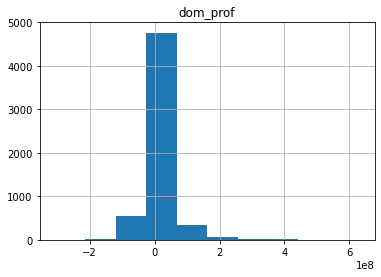

In [7]:
tn_numbers_floats_df.hist(column='dom_prof')

In [8]:
imdb_tn_combined_df = imdb_1tconst_df.merge(tn_numbers_floats_df, on='movie', how='right')
imdb_tn_combined_df.head(10)

NameError: name 'imdb_1tconst_df' is not defined

In [ ]:
imdb_tn_filtered_df = imdb_tn_combined_df.loc[:, ['averagerating', 'dom_prof', 'ww_prof']]
imdb_tn_filtered_df.dropna(subset=['averagerating'], inplace=True)
imdb_tn_filtered_df.drop(imdb_tn_filtered_df[imdb_tn_filtered_df['dom_prof'] < 0].index, inplace=True)
imdb_tn_filtered_df.sort_values(['averagerating', 'dom_prof'], ascending=False)

In [ ]:
imdb_tn_filtered_df.plot(x='averagerating', y='dom_prof', kind='scatter')